In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import accuracy_score

In [ ]:
center_info = pd.read_csv('/content/Centre_info.csv')
meal_info = pd.read_csv('/content/food_info.csv')
test_data = pd.read_csv('/content/test.csv')
train_data = pd.read_csv('/content/train.csv')

In [ ]:
center_info

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1


In [ ]:
meal_info

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian
5,1311,Extras,Thai
6,1062,Beverages,Italian
7,1778,Beverages,Italian
8,1803,Extras,Thai
9,1198,Extras,Thai


In [ ]:
merge1 = pd.merge(train_data, center_info, how='inner', on='center_id')
df = pd.merge(merge1, meal_info, how='inner', on='meal_id')
df.describe()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


In [ ]:
df = df.sort_values(by=['week'])
for i in df.columns:
    print(i)
    print('Unique Values: '+str(len(df.groupby([i]).count())))
    print(df[i].value_counts())

id
Unique Values: 456548
id
1379560    1
1483187    1
1391553    1
1446676    1
1426370    1
          ..
1241967    1
1363804    1
1062299    1
1214168    1
1361984    1
Name: count, Length: 456548, dtype: int64
week
Unique Values: 145
week
122    3359
105    3348
106    3347
140    3332
123    3331
       ... 
13     2838
12     2831
14     2830
7      2795
8      2786
Name: count, Length: 145, dtype: int64
center_id
Unique Values: 77
center_id
13     7046
10     7015
52     6993
43     6970
67     6915
       ... 
139    4627
57     4501
162    4366
41     4083
91     3432
Name: count, Length: 77, dtype: int64
meal_id
Unique Values: 51
meal_id
2290    11138
1062    11137
1727    11136
1109    11134
1754    11132
2707    11123
1778    11121
1993    11116
1962    11114
1971    11102
1885    11092
2581    11072
2826    11057
2322    11002
1558    10952
1207    10806
2640    10747
1230    10746
1878    10527
2631    10458
2539    10451
1543    10236
2760    10209
1248     9939
2664     

In [ ]:
num_cols=['center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'num_orders',
 'city_code',
 'region_code',
 'op_area']

In [ ]:
colors=['#b84949', '#ff6f00', '#ffbb00', '#9dff00', '#329906', '#439c55', '#67c79e', '#00a1db', '#002254', '#5313c2', '#c40fdb', '#e354aa']

In [ ]:
ts_tot_orders = df.groupby(['week'])['num_orders'].sum()
ts_tot_orders = pd.DataFrame(ts_tot_orders)
ts_tot_orders

,num_orders
week,
1,792261
2,787084
3,695262
4,743529
5,1198675
...,...
141,776240
142,739661
143,759926


In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyoff
plot_data = [
    go.Scatter(
        x=ts_tot_orders.index,
        y=ts_tot_orders['num_orders'],
        name='Time Series for num_orders',
        marker = dict(color = 'Blue')
    )
]
plot_layout = go.Layout(
        title='Total orders per week',
        yaxis_title='Total orders',
        xaxis_title='Week',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
center_id = df.groupby(['center_id'])['num_orders'].sum()
center_id = pd.DataFrame(center_id)

In [ ]:
center_id=center_id.reset_index()


In [ ]:
import plotly.express as px
fig = px.bar(center_id, x="center_id", y="num_orders", color='center_id')
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})

fig.show()

In [ ]:
meal_id = df.groupby(['meal_id'])['num_orders'].sum()
meal_id = pd.DataFrame(meal_id)
meal_id=meal_id.reset_index()


In [ ]:
import plotly.express as px
fig = px.bar(meal_id, x="meal_id", y="num_orders")
fig.update_layout({
'plot_bgcolor': 'rgba(1, 1, 1, 1)',
'paper_bgcolor': 'rgba(1, 1, 1, 1)',
})

fig.show()

In [ ]:
cat_var = ['center_type',
 'category',
 'cuisine']

In [ ]:
center_type = df.groupby(['center_type'])['num_orders'].sum()
center_type = pd.DataFrame(center_type)

In [ ]:
center_type


,num_orders
center_type,
TYPE_A,68978517
TYPE_B,29996073
TYPE_C,20582895


In [ ]:
center_type=center_type.reset_index()


In [ ]:
import plotly.express as px
fig = px.bar(center_type, x="center_type", y="num_orders", color='center_type')
fig.update_layout({
'plot_bgcolor': 'rgba(1, 1, 1, 1)',
'paper_bgcolor': 'rgba(0,0,0,0)',
})

fig.show()

In [ ]:
category = df.groupby(['category'])['num_orders'].sum()
category = pd.DataFrame(category)

In [ ]:
category = category.reset_index()


In [ ]:
import plotly.express as px
fig = px.bar(category, x="category", y="num_orders", color='category')
fig.update_layout({
'plot_bgcolor': 'rgba(1, 1, 1, 1)',
'paper_bgcolor': 'rgba(0,0,0,0)',
})
fig.show()

In [ ]:
cuisine = df.groupby(['cuisine'])['num_orders'].sum()
cuisine = pd.DataFrame(cuisine)
cuisine = cuisine.reset_index()
import plotly.express as px
fig = px.bar(cuisine, x="cuisine", y="num_orders", color='cuisine')
fig.update_layout({
'plot_bgcolor': 'rgba(1, 1, 1, 1)',
'paper_bgcolor': 'rgba(0,0,0,0)',
})
fig.show()

In [ ]:
cat_ct=df.groupby(['category', 'center_type'])['num_orders'].sum()
cat_ct = cat_ct.unstack().fillna(0)
cat_ct

center_type,TYPE_A,TYPE_B,TYPE_C
category,,,
Beverages,24633857,9340360,6506308
Biryani,348112,228273,55463
Desert,1006575,597142,337037
Extras,2385158,1251120,348701
Fish,468892,375444,27623
Other Snacks,2721316,1755359,289618
Pasta,893619,530987,213138
Pizza,4178759,1585932,1619029
Rice Bowl,11847850,5519104,3507109


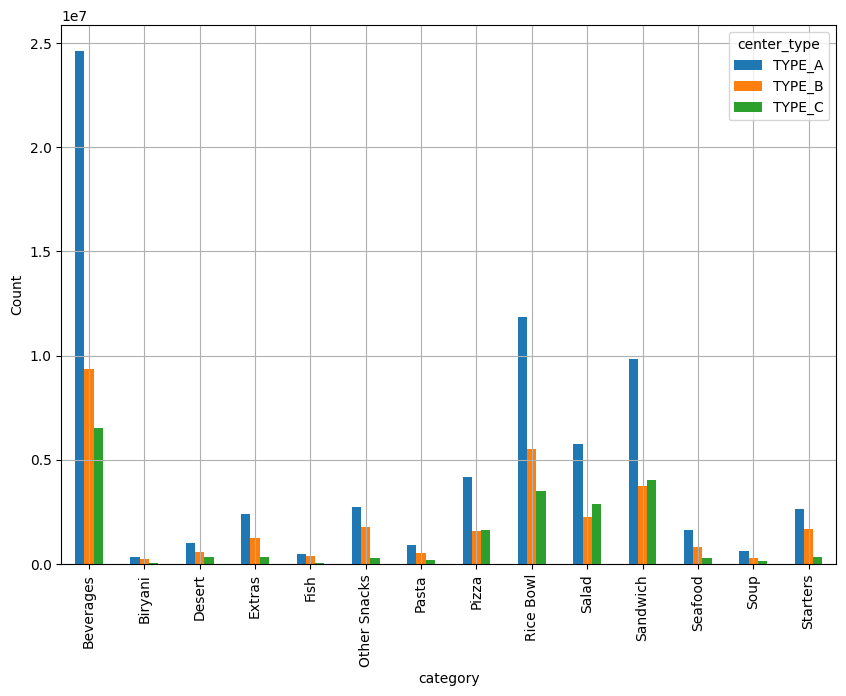

In [ ]:
# Visualize this data in bar plot
ax = (cat_ct).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Count')
plt.show()

In [ ]:
cat_cu=df.groupby(['category', 'cuisine'])['num_orders'].sum()
cat_cu = cat_cu.unstack().fillna(0)
cat_cu

cuisine,Continental,Indian,Italian,Thai
category,,,,
Beverages,5943046.0,2345879.0,13953970.0,18237630.0
Biryani,0.0,631848.0,0.0,0.0
Desert,0.0,1940754.0,0.0,0.0
Extras,0.0,0.0,0.0,3984979.0
Fish,871959.0,0.0,0.0,0.0
Other Snacks,0.0,0.0,0.0,4766293.0
Pasta,0.0,0.0,1637744.0,0.0
Pizza,7383720.0,0.0,0.0,0.0
Rice Bowl,0.0,20874063.0,0.0,0.0


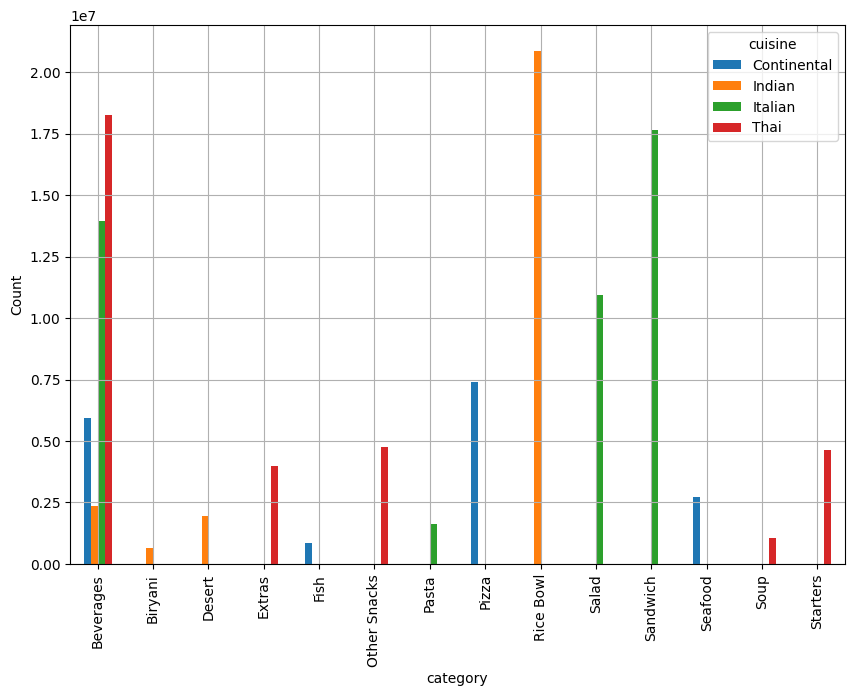

In [ ]:
# Visualize this data in bar plot
ax = (cat_cu).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Count')
plt.show()

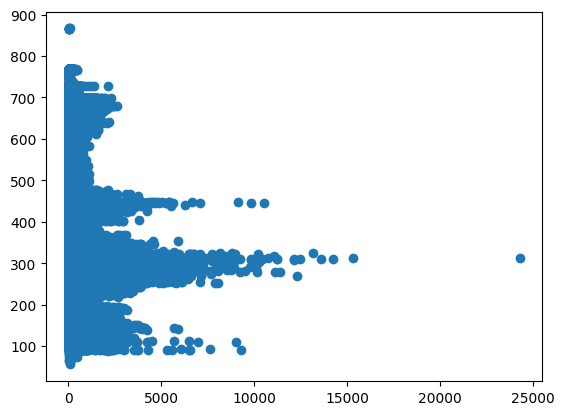

In [ ]:
x = df['num_orders']
y = df['base_price']

plt.scatter(x, y)
plt.show()

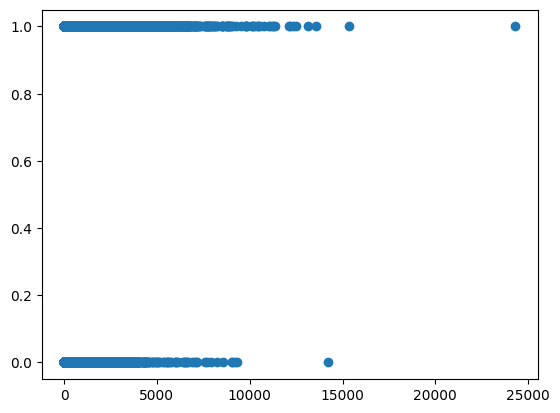

In [ ]:
x = df['num_orders']
y = df['emailer_for_promotion']

plt.scatter(x, y)
plt.show()

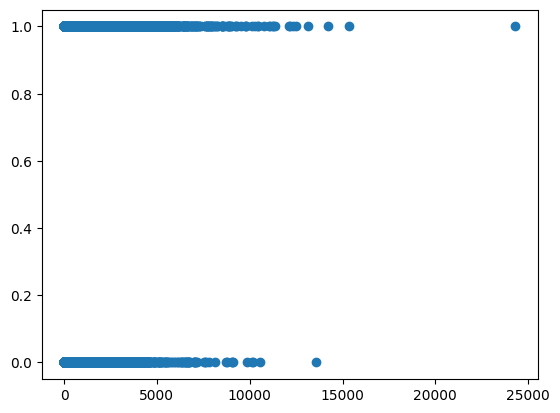

In [ ]:
x = df['num_orders']
y = df['homepage_featured']

plt.scatter(x, y)
plt.show()

In [ ]:
df_=df.copy()
for i in cat_var:
    df_[i] = pd.factorize(df_[i])[0]

In [ ]:
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [ ]:
X = df_.drop(['num_orders'], axis=1).values
y = df_['num_orders'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Root Mean Squared Error for LinearRegression:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# Example predictions for regression
y_pred = lr.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Root Mean Squared Error for LinearRegression: 343.66769848902646
Mean Absolute Error: 194.82342745329728


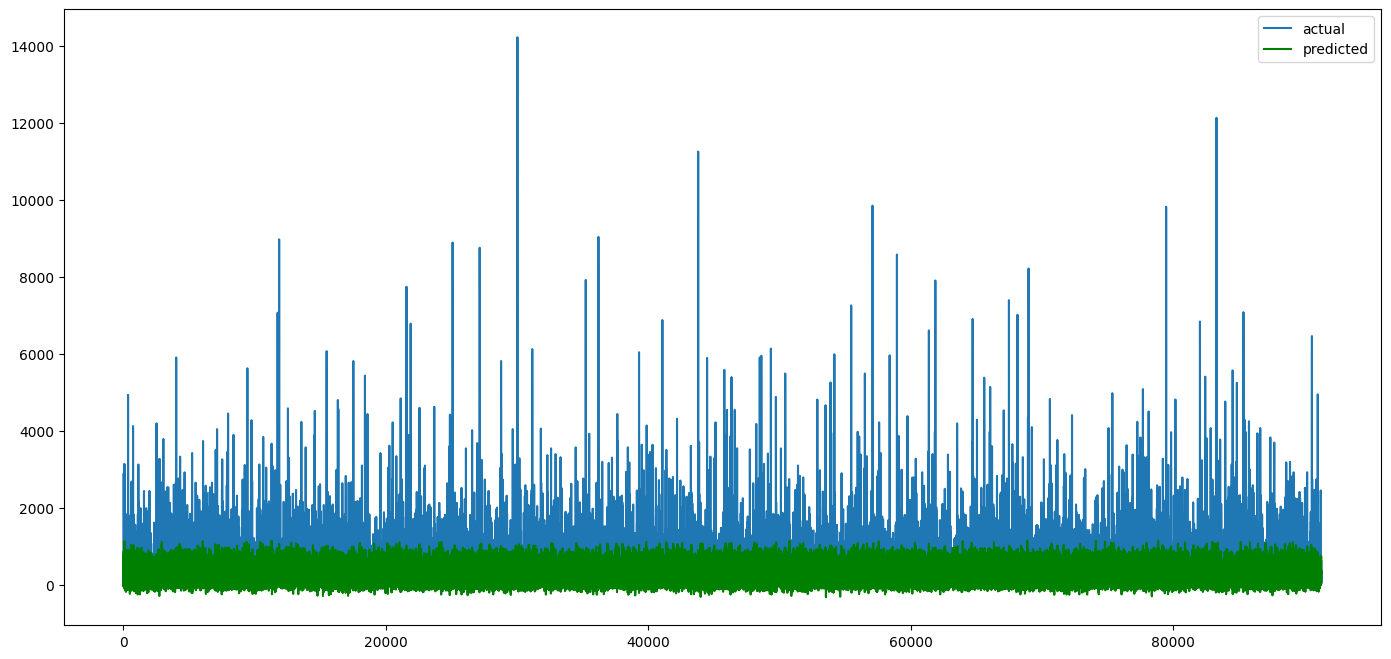

In [ ]:
#Trying to plot them all at once
from matplotlib import pyplot
pyplot.figure(figsize=(17, 8))
pyplot.plot(y_test, label="actual")
pyplot.plot(y_pred, color='green', label="predicted")
pyplot.legend(loc='best')
#pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Root Mean Squared Error for DecisionTree:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error for DecisionTree: 216.73893142675956


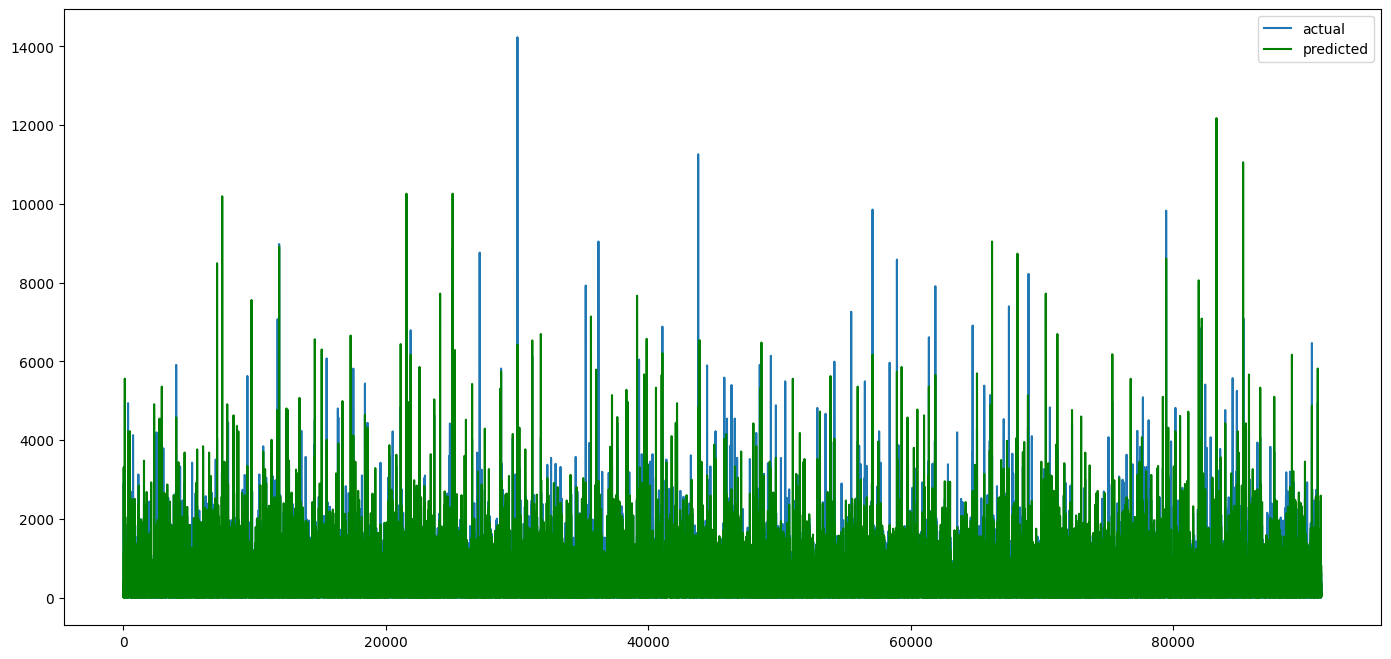

In [ ]:
#Trying to plot them all at once
from matplotlib import pyplot
pyplot.figure(figsize=(17, 8))
pyplot.plot(y_test, label="actual")
pyplot.plot(y_pred, color='green', label="predicted")
pyplot.legend(loc='best')
pyplot.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)


In [ ]:
regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

In [ ]:
print('Root Mean Squared Error for rf:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Root Mean Squared Error for rf: 216.73893142675956


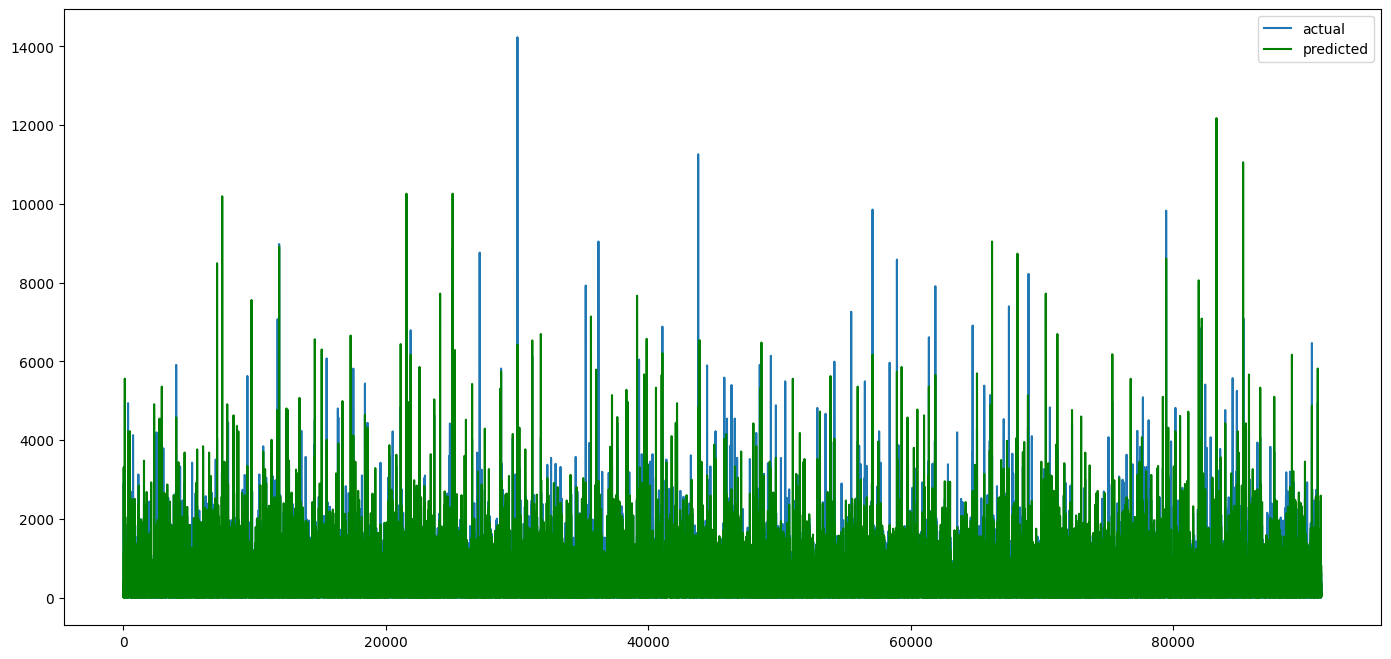

In [ ]:
#Trying to plot them all at once
from matplotlib import pyplot
pyplot.figure(figsize=(17, 8))
pyplot.plot(y_test, label="actual")
pyplot.plot(y_pred, color='green', label="predicted")
pyplot.legend(loc='best')
#pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse=mean_squared_error(y_test, y_pred)

print(np.sqrt(mse))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:00:28] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.



157.6570524670097


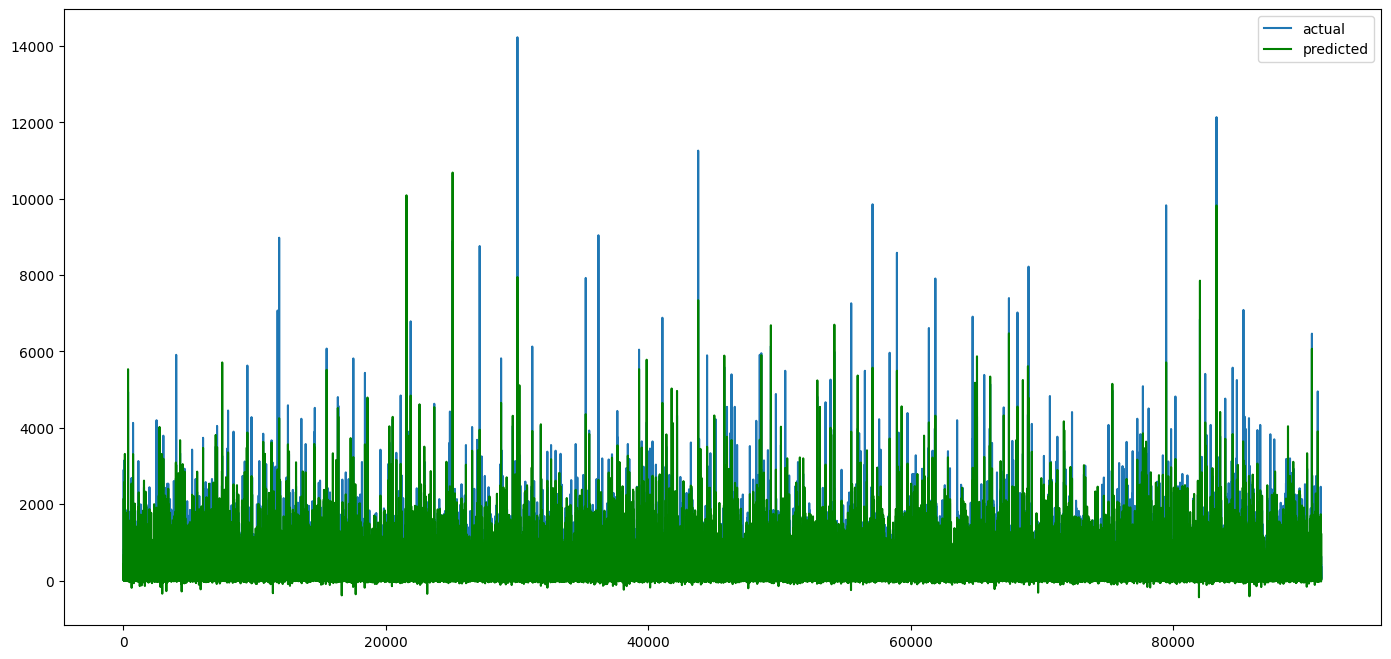

In [ ]:
#Trying to plot them all at once
from matplotlib import pyplot
pyplot.figure(figsize=(17, 8))
pyplot.plot(y_test, label="actual")
pyplot.plot(y_pred, color='green', label="predicted")
pyplot.legend(loc='best')
#pyplot.plot(predictions, color='red')
pyplot.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

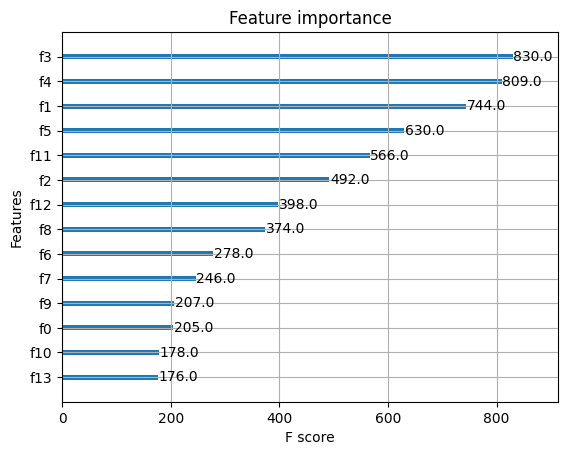

In [ ]:
xgb.plot_importance(xgb_model)

In [ ]:
training = df.loc[:, ['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders']]

In [ ]:
X_train = training.drop(['num_orders'], axis=1).values
y_train = training['num_orders'].values

In [ ]:
X_test = test_data.values

In [ ]:
from sklearn.metrics import r2_score
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
# Example predictions for regression
y_pred = xgb_model.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:20:29] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.



R-squared: 0.8402121663093567
Mean Absolute Error: 82.19959617633164


In [ ]:
ypred = pd.DataFrame(y_pred)
predictions = pd.merge(test_data, ypred, left_index=True, right_index=True, how='inner')
predictions['num_orders'] = predictions[0]
predictions = predictions.drop([0], axis=1)
ts_tot_pred = predictions.groupby(['week'])['num_orders'].sum()
ts_tot_pred = pd.DataFrame(ts_tot_pred)

In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyoff
plot_data = [
    go.Scatter(
        x=ts_tot_orders.index,
        y=ts_tot_orders['num_orders'],
        name='Time Series for num_orders',
        marker = dict(color = 'Blue')
        #x_axis="OTI",
        #y_axis="time",
    ),
    go.Scatter(
        x=ts_tot_pred.index,
        y=ts_tot_pred['num_orders'],
        name='Predicted',
        marker = dict(color = 'Red')
        #x_axis="OTI",
        #y_axis="time",
    )

]
plot_layout = go.Layout(
        title='Total orders per week',
        yaxis_title='Total orders',
        xaxis_title='Week',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)